옵션 델타(Option Delta)는 옵션 가격이 기초 자산의 가격 변동에 얼마나 민감하게 반응하는지를 나타내는 그리스 중 하나입니다. 델타는 기초 자산 가격이 1 단위 변동할 때 옵션 가격이 얼마나 변동하는지를 나타냅니다.

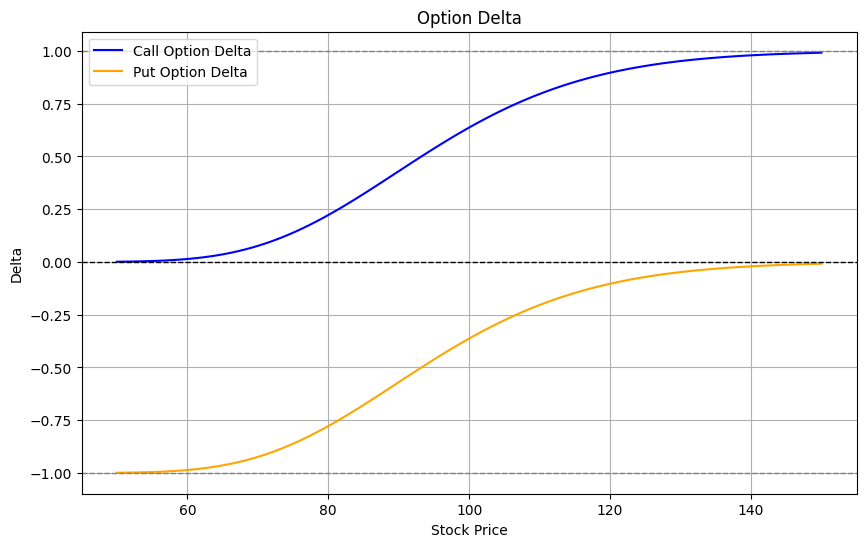

In [1]:
import numpy as np
import scipy.stats as si
import matplotlib.pyplot as plt

def black_scholes_delta(S, K, T, r, sigma, option_type="call"):
    """
    블랙-숄즈-머튼 델타 계산 함수

    Parameters:
    S: 현재 주식 가격
    K: 행사가격
    T: 만기 시간 (단위: 년)
    r: 무위험 이자율
    sigma: 변동성
    option_type: "call" 또는 "put"

    Returns:
    델타 값
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    if option_type == "call":
        delta = si.norm.cdf(d1, 0.0, 1.0)
    elif option_type == "put":
        delta = si.norm.cdf(d1, 0.0, 1.0) - 1
    else:
        raise ValueError("option_type must be 'call' or 'put'")
    return delta

# 예제 파라미터
S = np.linspace(50, 150, 100)  # 주식 가격 범위
K = 100  # 행사가격
T = 1  # 만기 시간 (1년)
r = 0.05  # 무위험 이자율
sigma = 0.2  # 변동성

# 델타 계산
call_deltas = [black_scholes_delta(s, K, T, r, sigma, option_type="call") for s in S]
put_deltas = [black_scholes_delta(s, K, T, r, sigma, option_type="put") for s in S]

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(S, call_deltas, label='Call Option Delta', color='blue')
plt.plot(S, put_deltas, label='Put Option Delta', color='orange')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.axhline(1, color='grey', linestyle='--', linewidth=1)
plt.axhline(-1, color='grey', linestyle='--', linewidth=1)
plt.title('Option Delta')
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.legend()
plt.grid(True)
plt.show()


## 실제 데이터 적용


[*********************100%%**********************]  1 of 1 completed


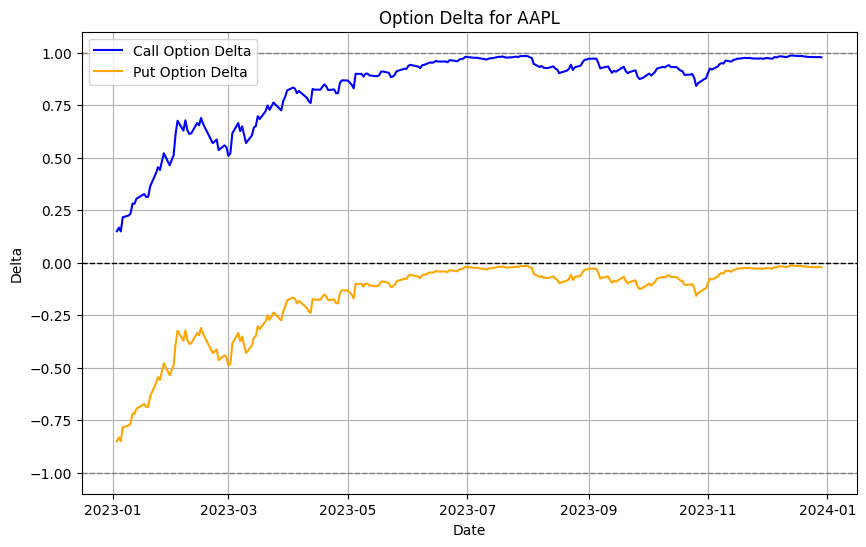

In [2]:
import numpy as np
import scipy.stats as si
import matplotlib.pyplot as plt
import yfinance as yf

def black_scholes_delta(S, K, T, r, sigma, option_type="call"):
    """
    블랙-숄즈-머튼 델타 계산 함수

    Parameters:
    S: 현재 주식 가격
    K: 행사가격
    T: 만기 시간 (단위: 년)
    r: 무위험 이자율
    sigma: 변동성
    option_type: "call" 또는 "put"

    Returns:
    델타 값
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    if option_type == "call":
        delta = si.norm.cdf(d1, 0.0, 1.0)
    elif option_type == "put":
        delta = si.norm.cdf(d1, 0.0, 1.0) - 1
    else:
        raise ValueError("option_type must be 'call' or 'put'")
    return delta

# yfinance를 사용하여 데이터 다운로드
ticker = 'AAPL'
data = yf.download(ticker, start="2023-01-01", end="2023-12-31")
closing_prices = data['Close'].values

# 예제 파라미터
K = 150  # 행사가격
T = 0.5  # 만기 시간 (6개월)
r = 0.05  # 무위험 이자율
sigma = 0.2  # 변동성

# 델타 계산
call_deltas = [black_scholes_delta(s, K, T, r, sigma, option_type="call") for s in closing_prices]
put_deltas = [black_scholes_delta(s, K, T, r, sigma, option_type="put") for s in closing_prices]

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(data.index, call_deltas, label='Call Option Delta', color='blue')
plt.plot(data.index, put_deltas, label='Put Option Delta', color='orange')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.axhline(1, color='grey', linestyle='--', linewidth=1)
plt.axhline(-1, color='grey', linestyle='--', linewidth=1)
plt.title('Option Delta for AAPL')
plt.xlabel('Date')
plt.ylabel('Delta')
plt.legend()
plt.grid(True)
plt.show()
